In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import stdev
import math
import statistics

In [2]:
df=pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Veriyi Tanımak

In [3]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
df.shape

(344, 7)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


# On Isleme

In [6]:
# tekrar eden verileri bulma
df.duplicated().sum()

0

In [7]:
print(df.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g']] = imputer.fit_transform(df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g']])

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['sex']] = imputer.fit_transform(df[['sex']])

In [11]:
print(df.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [12]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


# Normalization 

In [13]:
for column in df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']]:
    
    df[column] = df[column]  / df[column].abs().max()
    
display(df)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.656040,0.869767,0.783550,0.595238,MALE
1,Adelie,Torgersen,0.662752,0.809302,0.805195,0.603175,FEMALE
2,Adelie,Torgersen,0.676174,0.837209,0.844156,0.515873,FEMALE
3,Adelie,Torgersen,0.736945,0.797729,0.869763,0.666945,MALE
4,Adelie,Torgersen,0.615772,0.897674,0.835498,0.547619,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,0.736945,0.797729,0.869763,0.666945,MALE
340,Gentoo,Biscoe,0.785235,0.665116,0.930736,0.769841,FEMALE
341,Gentoo,Biscoe,0.845638,0.730233,0.961039,0.912698,MALE
342,Gentoo,Biscoe,0.758389,0.688372,0.917749,0.825397,FEMALE


In [14]:
# Label Encoder
import category_encoders as ce

In [15]:
encoder= ce.OrdinalEncoder(cols=['island','sex'])
df=encoder.fit_transform(df)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,1,0.656040,0.869767,0.783550,0.595238,1
1,Adelie,1,0.662752,0.809302,0.805195,0.603175,2
2,Adelie,1,0.676174,0.837209,0.844156,0.515873,2
3,Adelie,1,0.736945,0.797729,0.869763,0.666945,1
4,Adelie,1,0.615772,0.897674,0.835498,0.547619,2


# Veri Görselleştirme

In [16]:
Adelie=df[df.species=='Adelie']
Chinstrap=df[df.species=='Chinstrap']
Gentoo=df[df.species=='Gentoo']

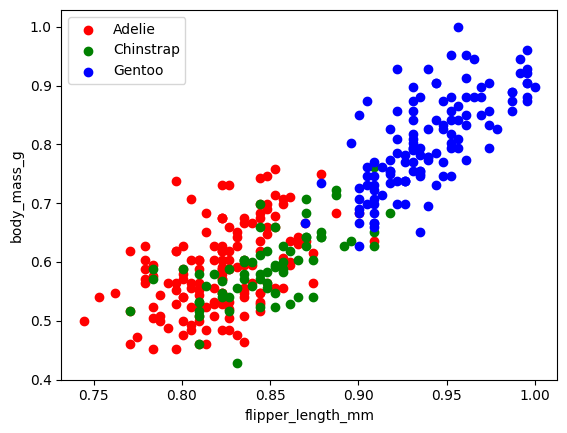

In [17]:
plt.scatter(Adelie.flipper_length_mm, Adelie.body_mass_g, color='red', label='Adelie')
plt.scatter(Chinstrap.flipper_length_mm, Chinstrap.body_mass_g, color='green', label='Chinstrap')
plt.scatter(Gentoo.flipper_length_mm, Gentoo.body_mass_g, color='blue', label='Gentoo')
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.legend()
plt.show()

In [18]:
# Shuffle dataset rows
df=df.sample(frac = 1)

In [19]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
241,Gentoo,2,0.756711,0.674419,0.930736,0.793651,2
105,Adelie,2,0.666107,0.879070,0.796537,0.563492,1
325,Gentoo,2,0.785235,0.748837,0.930736,0.873016,1
8,Adelie,1,0.572148,0.841860,0.835498,0.551587,1
190,Chinstrap,3,0.786913,0.772093,0.831169,0.428571,2


### Veri setinin eğitim ve test seti olarak ayrılması

In [20]:
X=df.drop(['species'],axis=1)
Y=df['species']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [22]:
X_train.shape, X_test.shape

((240, 6), (104, 6))

In [23]:
X_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
38,3,0.630872,0.897674,0.783550,0.523810,2
167,3,0.847315,0.911628,0.870130,0.642857,1
75,1,0.718121,0.860465,0.844156,0.674603,1
235,2,0.827181,0.730233,0.939394,0.928571,1
266,2,0.763423,0.646512,0.909091,0.666667,2
...,...,...,...,...,...,...
100,2,0.587248,0.832558,0.831169,0.591270,2
88,3,0.642617,0.893023,0.818182,0.626984,1
172,3,0.711409,0.804651,0.783550,0.571429,2
189,3,0.872483,0.962791,0.909091,0.761905,1


In [24]:
Y_train

38        Adelie
167    Chinstrap
75        Adelie
235       Gentoo
266       Gentoo
         ...    
100       Adelie
88        Adelie
172    Chinstrap
189    Chinstrap
161    Chinstrap
Name: species, Length: 240, dtype: object

# Naive Bayes 

In [25]:
Y_train=Y_train.tolist()

In [26]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [27]:
X_train=X_train.to_numpy()

In [28]:
class features:
    def __init__(self, findis, fdata):
        self.fdata = [fdata]
        self.findis=findis
    def add_data(self,data):
        self.fdata.append(data)
    def stdrt_deviation(self):
        return stdev(self.fdata)
    def ret_mean(self):
        return statistics.mean(self.fdata)
    def probability(self,data):
        stsap=stdev(self.fdata)
        if stsap==0:
            stsap=1
        prob=(1/(stsap*math.sqrt(2*math.pi)))*(math.exp((-1/2)*math.pow((data-statistics.mean(self.fdata))/stsap,2)))
        return prob

#### Eğitim verilerini her özellik için listelere aktarılması

In [29]:
# Adelie, Chinstrap, Gentoo
alist=[]; clist=[]; glist=[];
for i in range(len(Y_train)):
    if Y_train[i]=='Adelie':
        if alist:
            for j in range(6):
                alist[j].add_data(X_train[i][j])
        else:
            for j in range(6):
                alist.append(features(j,X_train[i][j]))
    elif Y_train[i]=='Chinstrap':
        if clist:
            for j in range(6):
                clist[j].add_data(X_train[i][j])
        else:
            for j in range(6):
                clist.append(features(j,X_train[i][j]))
    elif Y_train[i]=='Gentoo':
        if glist:
            for j in range(6):
                glist[j].add_data(X_train[i][j])
        else:
            for j in range(6):
                glist.append(features(j,X_train[i][j]))
        
                

In [30]:
# Adelie sınıfı için her sütünun standart sapma değerleri
for i in range(6):
    print(alist[i].stdrt_deviation())

0.8478486610385855
0.045886287223046766
0.056434509046964634
0.02817226613408896
0.07340693817136312
0.5009509820989526


In [31]:
# model sonuç etiketlerinin tutulduğu sınıf
p_test=[]
row,col=len(X_test.axes[0]),len(X_test.axes[1])
X_test=X_test.to_numpy()
Y_test=Y_test.tolist()

In [32]:
for i in range(row):
    pa,pc,pg=0,0,0;
    for j in range(col):
        pa+=alist[j].probability(X_test[i][j])
        pc+=clist[j].probability(X_test[i][j])
        pg+=glist[j].probability(X_test[i][j])
    if pa>pc and pa>pg:
        p_test.append('Adelie')
    elif pc>pa and pc>pg:
        p_test.append('Chinstrap')
    elif pg>pa and pg>pc:
        p_test.append('Gentoo')

In [33]:
len(p_test)

104

In [34]:
# hata sayisi
fcount=0
for i in range(len(p_test)):
    if Y_test[i]!=p_test[i]:
        fcount+=1
    print(Y_test[i],p_test[i],sep=((18-len(Y_test[i]))*' '))

Gentoo            Gentoo
Gentoo            Gentoo
Gentoo            Gentoo
Adelie            Adelie
Gentoo            Gentoo
Adelie            Adelie
Gentoo            Gentoo
Gentoo            Gentoo
Gentoo            Gentoo
Adelie            Adelie
Chinstrap         Chinstrap
Gentoo            Gentoo
Gentoo            Gentoo
Adelie            Adelie
Adelie            Adelie
Adelie            Adelie
Chinstrap         Chinstrap
Adelie            Chinstrap
Adelie            Chinstrap
Gentoo            Gentoo
Gentoo            Gentoo
Chinstrap         Adelie
Chinstrap         Chinstrap
Gentoo            Gentoo
Adelie            Adelie
Adelie            Adelie
Chinstrap         Adelie
Chinstrap         Chinstrap
Adelie            Adelie
Chinstrap         Chinstrap
Gentoo            Gentoo
Adelie            Adelie
Chinstrap         Chinstrap
Adelie            Adelie
Gentoo            Gentoo
Gentoo            Gentoo
Chinstrap         Adelie
Adelie            Adelie
Gentoo            Gentoo
G

In [35]:
fcount

12

In [36]:
tcount=len(p_test)-fcount
accuracy_score=tcount/len(Y_test)

In [37]:
print(accuracy_score)

0.8846153846153846


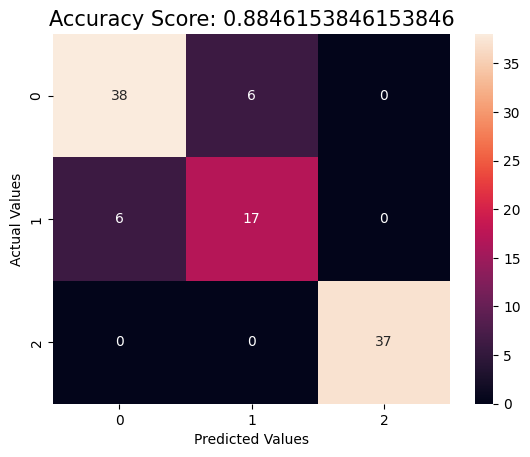

In [38]:
from sklearn.metrics import confusion_matrix as cm
from sklearn import metrics
import seaborn as sns
score=metrics.accuracy_score(Y_test, p_test)
cm1=cm(Y_test, p_test)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size=15)
plt.show()

#  K-Means

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
import random
import math

In [52]:
a_count=df[df.species=='Adelie'].count()
c_count=df[df.species=='Chinstrap'].count()
g_count=df[df.species=='Gentoo'].count()
a_count=a_count[0]
c_count=c_count[0]
g_count=g_count[0]

In [53]:
a_count, c_count, g_count

(152, 68, 124)

In [54]:
df_label=df['species']
df_kmeans=df.drop(['species'],axis=1)
df_kmeans.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
241,2,0.756711,0.674419,0.930736,0.793651,2
105,2,0.666107,0.879070,0.796537,0.563492,1
325,2,0.785235,0.748837,0.930736,0.873016,1
8,1,0.572148,0.841860,0.835498,0.551587,1
190,3,0.786913,0.772093,0.831169,0.428571,2


In [55]:
df_kmeans=df_kmeans.to_numpy()

In [58]:
# kume merkezlerini random olarak vermek
C1=df_kmeans[random.randint(0,len(df_kmeans))]
C2=df_kmeans[random.randint(0,len(df_kmeans))]
C3=df_kmeans[random.randint(0,len(df_kmeans))]

In [59]:
C1=[round(a,4) for a in C1]
C2=[round(a,4) for a in C2]
C3=[round(a,4) for a in C3]

In [60]:
C1, C2, C3

([2.0, 0.8305, 0.7488, 0.9697, 0.8968, 1.0],
 [2.0, 0.8121, 0.6698, 0.8788, 0.7341, 2.0],
 [2.0, 0.7567, 0.6698, 0.9091, 0.6984, 2.0])

In [61]:
# Öklid uzaklık fonksiyonu
def distance(arr1, arr2):
    count=0
    for i in range(len(arr1)):
        count+=math.pow((arr1[i]-arr2[i]),2)
    return math.sqrt(count)

In [62]:
# sinif etiket tahmini
def calc_distance(C1,C2,C3):
    label_pred=[]
    for i in range(len(df_kmeans)):
        d1=distance(C1,df_kmeans[i])
        d2=distance(C2,df_kmeans[i])
        d3=distance(C3,df_kmeans[i])
        #print(d1,d2,d3,sep=' ')
        if d1<d2 and d1<d3:
            label_pred.append('C1')
        elif d2<d1 and d2<d3:
            label_pred.append('C2')
        elif d3<d1 and d3<d2:
            label_pred.append('C3')
    return label_pred

In [63]:
# yeni kume merkezleri hesabi
def new_kmeans(label_pred):
    nC1,nC2,nC3=[],[],[];
    for i in range(len(df_kmeans)):
        if label_pred[i]=='C1':
            if nC1:
                for j in range(6):
                    nC1[j]+=df_kmeans[i][j]
            else:
                for j in range(6):
                    nC1.append(df_kmeans[i][j])
        elif label_pred[i]=='C2':
            if nC2:
                for j in range(6):
                    nC2[j]+=df_kmeans[i][j]
            else:
                for j in range(6):
                    nC2.append(df_kmeans[i][j])
        elif label_pred[i]=='C3':
            if nC3:
                for j in range(6):
                    nC3[j]+=df_kmeans[i][j]
            else:
                for j in range(6):
                    nC3.append(df_kmeans[i][j])
    nC1=[round(a/label_pred.count('C1'),4) for a in nC1]
    nC2=[round(a/label_pred.count('C2'),4) for a in nC2]
    nC3=[round(a/label_pred.count('C3'),4) for a in nC3]
    #print(nC1,nC2,nC3,sep='\n')
    return nC1,nC2,nC3

In [64]:
label_pred=calc_distance(C1,C2,C3)
nC1,nC2,nC3=new_kmeans(label_pred)
ayrac="Yeni Kume Merkezleri"
print(C1,C2,C3,ayrac,nC1,nC2,nC3,sep='\n')

[2.0, 0.8305, 0.7488, 0.9697, 0.8968, 1.0]
[2.0, 0.8121, 0.6698, 0.8788, 0.7341, 2.0]
[2.0, 0.7567, 0.6698, 0.9091, 0.6984, 2.0]
Yeni Kume Merkezleri
[2.1966, 0.7653, 0.8294, 0.8836, 0.7163, 1.0]
[2.1111, 0.8038, 0.6935, 0.9136, 0.7529, 2.0]
[2.2446, 0.6877, 0.7774, 0.8435, 0.587, 2.0072]


In [65]:
while 1:
    #print(C1,C2,C3,sep='\n')  
    if C1==nC1 and C2==nC2 and C3==nC3:
        break
    else:
        C1,C2,C3=nC1,nC2,nC3;
        print(C1,C2,C3,sep='\n')
        label_pred=calc_distance(C1,C2,C3)
        nC1,nC2,nC3=new_kmeans(label_pred)

[2.1966, 0.7653, 0.8294, 0.8836, 0.7163, 1.0]
[2.1111, 0.8038, 0.6935, 0.9136, 0.7529, 2.0]
[2.2446, 0.6877, 0.7774, 0.8435, 0.587, 2.0072]
[2.1966, 0.7653, 0.8294, 0.8836, 0.7163, 1.0]
[1.7108, 0.7254, 0.7076, 0.8905, 0.6843, 2.012]
[2.7349, 0.6877, 0.8199, 0.8193, 0.5438, 2.0]
[2.1966, 0.7653, 0.8294, 0.8836, 0.7163, 1.0]
[1.7714, 0.7048, 0.7319, 0.8737, 0.6529, 2.0095]
[3.0, 0.7097, 0.8187, 0.8226, 0.547, 2.0]


In [66]:
spr="-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*"
print(C1,nC1,spr,C2,nC2,spr,C3,nC3,sep='\n')

[2.1966, 0.7653, 0.8294, 0.8836, 0.7163, 1.0]
[2.1966, 0.7653, 0.8294, 0.8836, 0.7163, 1.0]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
[1.7714, 0.7048, 0.7319, 0.8737, 0.6529, 2.0095]
[1.7714, 0.7048, 0.7319, 0.8737, 0.6529, 2.0095]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
[3.0, 0.7097, 0.8187, 0.8226, 0.547, 2.0]
[3.0, 0.7097, 0.8187, 0.8226, 0.547, 2.0]


In [67]:
# oluşan C1 C2 ve C3 kümelerinde Adelie, Chinstrap, Gentoo sınıf etiketlerinden kaçar adet olduğunun hesabı
ac_list=[0,0,0]
cc_list=[0,0,0]
gc_list=[0,0,0]
for i in range(len(label_pred)):
    if df_label[i]=="Adelie":
        if label_pred[i]=="C1":
            ac_list[0]=ac_list[0]+1
        elif label_pred[i]=="C2":
            ac_list[1]=ac_list[1]+1
        elif label_pred[i]=="C3":
            ac_list[2]=ac_list[2]+1
    elif df_label[i]=="Chinstrap":
        if label_pred[i]=="C1":
            cc_list[0]=cc_list[0]+1
        elif label_pred[i]=="C2":
            cc_list[1]=cc_list[1]+1
        elif label_pred[i]=="C3":
            cc_list[2]=cc_list[2]+1
    elif df_label[i]=="Gentoo":
        if label_pred[i]=="C1":
            gc_list[0]=gc_list[0]+1
        elif label_pred[i]=="C2":
            gc_list[1]=gc_list[1]+1
        elif label_pred[i]=="C3":
            gc_list[2]=gc_list[2]+1

In [68]:
print(ac_list,cc_list,gc_list,sep='\n')

[86, 37, 29]
[32, 22, 14]
[60, 46, 18]


In [69]:
a_count, c_count, g_count

(152, 68, 124)

In [77]:
for i in range(3):
    j=0
    a_prob=round(ac_list[i]/a_count,3)
    c_prob=round(cc_list[i]/c_count,3)
    g_prob=round(gc_list[i]/g_count,3)
    if a_prob>c_prob and a_prob>g_prob:
        # Ci Adelie etiketini alir
        while j<len(label_pred):
            if label_pred[j]=="C"+str(i+1):
                label_pred[j]="Adelie"
            j+=1
    elif c_prob>a_prob and c_prob>g_prob:
        # Ci Chinstrap etiketini alir
        while j<len(label_pred):
            if label_pred[j]=="C"+str(i+1):
                label_pred[j]="Chinstrap"
            j+=1
    elif g_prob>c_prob and g_prob>a_prob:
        # Ci Gentoo etiketini alir
        while j<len(label_pred):
            if label_pred[j]=="C"+str(i+1):
                label_pred[j]="Gentoo"
            j+=1
            
    print("C",i+1," kümesinin Adelie=>",a_prob," Chinstrap=>",c_prob," Gentoo=>",g_prob,sep='')

C1 kümesinin Adelie=>0.566 Chinstrap=>0.471 Gentoo=>0.484
C2 kümesinin Adelie=>0.243 Chinstrap=>0.324 Gentoo=>0.371
C3 kümesinin Adelie=>0.191 Chinstrap=>0.206 Gentoo=>0.145


In [79]:
fcount=0
for i in range(len(label_pred)):
    if df_label[i]!=label_pred[i]:
        fcount+=1
    print(df_label[i],label_pred[i],sep=((18-len(df_label[i]))*' '))

Adelie            Gentoo
Adelie            Adelie
Adelie            Adelie
Adelie            Adelie
Adelie            Chinstrap
Adelie            Adelie
Adelie            Adelie
Adelie            Chinstrap
Adelie            Adelie
Adelie            Chinstrap
Adelie            Adelie
Adelie            Adelie
Adelie            Chinstrap
Adelie            Adelie
Adelie            Gentoo
Adelie            Adelie
Adelie            Gentoo
Adelie            Adelie
Adelie            Adelie
Adelie            Gentoo
Adelie            Gentoo
Adelie            Adelie
Adelie            Adelie
Adelie            Gentoo
Adelie            Adelie
Adelie            Gentoo
Adelie            Adelie
Adelie            Adelie
Adelie            Chinstrap
Adelie            Adelie
Adelie            Adelie
Adelie            Gentoo
Adelie            Adelie
Adelie            Chinstrap
Adelie            Adelie
Adelie            Gentoo
Adelie            Adelie
Adelie            Adelie
Adelie            Adelie
Adelie 

In [80]:
fcount

198

In [81]:
tcount=len(label_pred)-fcount
accuracy_score=tcount/len(df_label)
accuracy_score

0.42441860465116277

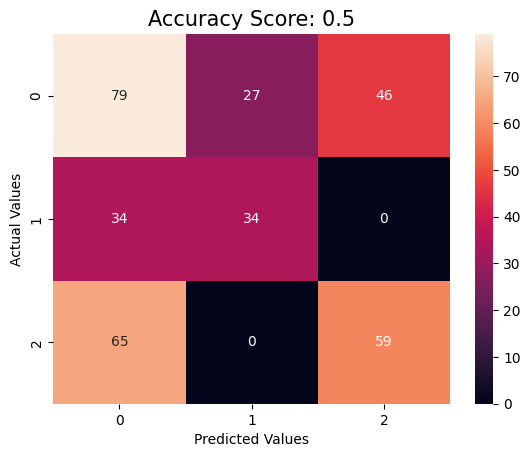

In [82]:
from sklearn.metrics import confusion_matrix as cm
from sklearn import metrics
import seaborn as sns
score=metrics.accuracy_score(df_label, label_pred)
cm1=cm(df_label, label_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size=15)
plt.show()